In [115]:
import matplotlib.pyplot as plt
import numpy as np
from lmfit import models

In [116]:
# Opening File

# Importing Data
x = []
y = []

# Open file in read mode
with open("../20251105 Na-22 01.csv", "r", newline="") as file:
    # Skip header
    next(file)

    for line in file:
        # split column
        line_splitted = line.split(",")
        x.append(float(line_splitted[0]))
        y.append(float(line_splitted[1]))

# Convert lists to numpy arrays
x_array = np.array(x)
y_array = np.array(y)



In [117]:
# Define ranges of masked / unmasked ranges

# Define the two unmasked x-ranges
x_min1, x_max1 = 60, 1240
x_min2, x_max2 = 1822, 2336

# Create boolean masks for each unmasked range
mask_range1 = (x_array >= x_min1) & (x_array <= x_max1)
mask_range2 = (x_array >= x_min2) & (x_array <= x_max2)

# Combine both unmasked ranges
unmasked_mask = mask_range1 | mask_range2

# Masked = everything outside both ranges
masked_mask = ~unmasked_mask

# Separate data for plotting/fitting
x_selection_1 = x_array[mask_range1]
y_selection_1 = y_array[mask_range1]

x_selection_2 = x_array[mask_range2]
y_selection_2 = y_array[mask_range2]

x_masked = x_array[masked_mask]
y_masked = y_array[masked_mask]



In [118]:
# Fit to Gaussian funtion

# --- Fit Gaussian to first range ---
gauss1 = models.GaussianModel(prefix='g1_')
pars1 = gauss1.guess(y_selection_1, x=x_selection_1)
result1 = gauss1.fit(y_selection_1, pars1, x=x_selection_1)

print(x_selection_1)
print(y_selection_1)
print(max(y_selection_1))

# Fit Gaussian to second range
gauss2 = models.GaussianModel(prefix="g2_")
pars2 = gauss2.guess(y_selection_2, x=x_selection_2)
result2 = gauss2.fit(y_selection_2, pars2, x=x_selection_2)


[  98.03921569  137.25490196  176.47058824  215.68627451  254.90196078
  294.11764706  333.33333333  372.54901961  411.76470588  450.98039216
  490.19607843  529.41176471  568.62745098  607.84313725  647.05882353
  686.2745098   725.49019608  764.70588235  803.92156863  843.1372549
  882.35294118  921.56862745  960.78431373 1000.         1039.21568627
 1078.43137255 1117.64705882 1156.8627451  1196.07843137 1235.29411765]
[ 48. 119.  66.  87.  88. 100. 105. 122. 112. 127. 114.  92. 138. 139.
 155. 127. 136. 128. 105.  84.  88.  78.  57.  71.  48.  64.  53.  60.
  50.  56.]
155.0


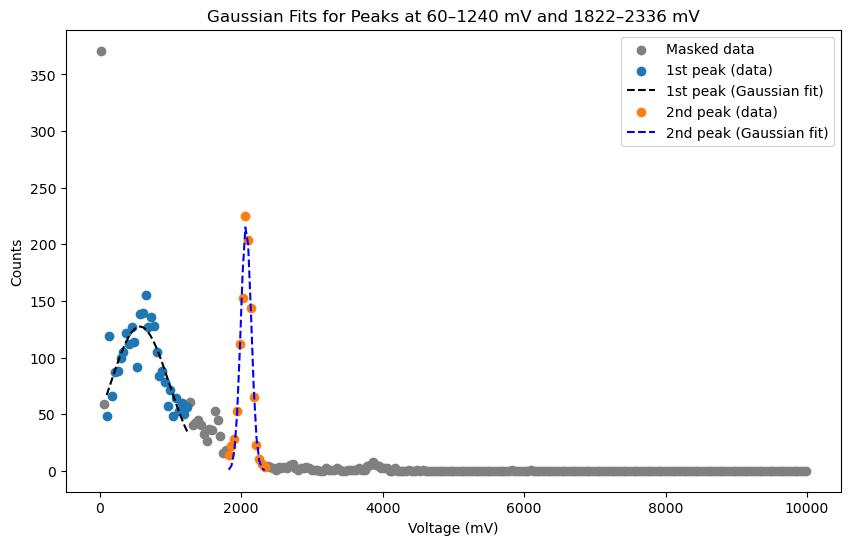

In [119]:
# Creating Plot with Gaussian fits

plt.figure(figsize=(10, 6))

# Masked data (outside both peaks)
plt.scatter(x_masked, y_masked, color="grey", label="Masked data")

# Unmasked and fitted data for each peak
plt.scatter(x_selection_1, y_selection_1, label="1st peak (data)")
plt.plot(x_selection_1, result1.best_fit, "k--", label="1st peak (Gaussian fit)")

plt.scatter(x_selection_2, y_selection_2, label="2nd peak (data)")
plt.plot(x_selection_2, result2.best_fit, "b--", label="2nd peak (Gaussian fit)")

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Gaussian Fits for Peaks at 60–1240 mV and 1822–2336 mV")
plt.legend()
plt.show()



In [120]:
# Printing fit result

print("\n=== Gaussian Fit 1 (60–1240 mV) ===")
print(result1.fit_report())

print("\n=== Gaussian Fit 2 (1822–2336 mV) ===")
print(result2.fit_report())



=== Gaussian Fit 1 (60–1240 mV) ===
[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 30
    # variables        = 3
    chi-square         = 8042.78145
    reduced chi-square = 297.880795
    Akaike info crit   = 173.739986
    Bayesian info crit = 177.943578
    R-squared          = 0.72922389
[[Variables]]
    g1_amplitude:  132059.197 +/- 7397.18224 (5.60%) (init = 107000)
    g1_center:     567.876489 +/- 22.7143577 (4.00%) (init = 538.4615)
    g1_sigma:      413.653255 +/- 29.9619655 (7.24%) (init = 333.3333)
    g1_fwhm:       974.078958 +/- 70.5550354 (7.24%) == '2.3548200*g1_sigma'
    g1_height:     127.362711 +/- 5.34881245 (4.20%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(g1_amplitude, g1_sigma)  = +0.8159
    C(g1_center, g1_sigma)     = -0.2961
    C(g1_amplitude, g1_center) = -0.2906

=== Gaussian Fit 2 (1

Lineaire fit

In [121]:
Peak_values = [511, 1274.5, 622] # Literaire piekwaarden in keV
sodium_height_1 = result1.params['g1_height'].value
sodium_height_2 = result2.params['g2_height'].value

print(sodium_height_1)


127.36271076927544


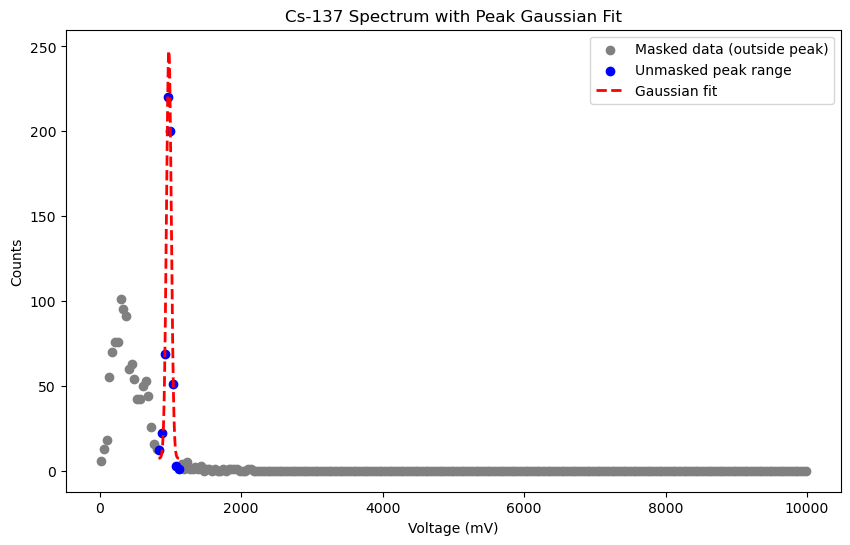

[[Model]]
    (Model(gaussian, prefix='cs_') + Model(constant, prefix='bkg_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 147
    # data points      = 8
    # variables        = 4
    chi-square         = 214.176092
    reduced chi-square = 53.5440231
    Akaike info crit   = 34.2988560
    Bayesian info crit = 34.6166221
    R-squared          = 0.99608020
[[Variables]]
    cs_amplitude:  20387.9674 +/- 966.090234 (4.74%) (init = 220)
    cs_center:     977.212628 +/- 1.17056892 (0.12%) (init = 960.7843)
    cs_sigma:      33.8590660 +/- 1.50888168 (4.46%) (init = 48.33333)
    bkg_c:         7.26348500 +/- 4.02188721 (55.37%) (init = 1)
    cs_fwhm:       79.7320057 +/- 3.55314475 (4.46%) == '2.3548200*cs_sigma'
    cs_height:     240.219934 +/- 7.84171942 (3.26%) == '0.3989423*cs_amplitude/max(1e-15, cs_sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(cs_amplitude, bkg_c)    = -0.7657
    C(cs_amplitude, cs_sigma) = +0.7496
    C

In [122]:
# CESIUM 


# --- Opening File for Cs-137 ---
cs_voltage = []
cs_counts = []

with open("../20251105 Cs-137 01.csv", "r", newline="") as file:
    next(file)
    for line in file:
        parts = line.split(",")
        cs_voltage.append(float(parts[0]))
        cs_counts.append(float(parts[1]))

cs_voltage_array = np.array(cs_voltage)
cs_counts_array = np.array(cs_counts)

# --- Define the unmasked peak range ---
cs_peak_min, cs_peak_max = 830, 1120
peak_mask = (cs_voltage_array >= cs_peak_min) & (cs_voltage_array <= cs_peak_max)

# Masked = everything outside the peak range
masked_mask = ~peak_mask

# Separate masked/unmasked data
cs_voltage_unmasked = cs_voltage_array[peak_mask]
cs_counts_unmasked = cs_counts_array[peak_mask]

cs_voltage_masked = cs_voltage_array[masked_mask]
cs_counts_masked = cs_counts_array[masked_mask]

# --- Gaussian + baseline fit for unmasked peak ---
gauss_cs = models.GaussianModel(prefix='cs_') + models.ConstantModel(prefix='bkg_')
params = gauss_cs.make_params()
params['cs_center'].set(value=cs_voltage_unmasked[np.argmax(cs_counts_unmasked)])
params['cs_sigma'].set(value=(cs_peak_max - cs_peak_min)/6, min=1)
params['cs_amplitude'].set(value=max(cs_counts_unmasked))
params['bkg_c'].set(value=min(cs_counts_unmasked))
result_cs = gauss_cs.fit(cs_counts_unmasked, params, x=cs_voltage_unmasked)

# --- Plot full spectrum ---
plt.figure(figsize=(10,6))

# Masked points (outside peak range)
plt.scatter(cs_voltage_masked, cs_counts_masked, color='grey', label='Masked data (outside peak)')

# Unmasked peak range
plt.scatter(cs_voltage_unmasked, cs_counts_unmasked, color='blue', label='Unmasked peak range')

# Gaussian fit line
x_fit = np.linspace(cs_peak_min, cs_peak_max, 500)
plt.plot(x_fit, gauss_cs.eval(result_cs.params, x=x_fit), 'r--', linewidth=2, label='Gaussian fit')

plt.xlabel("Voltage (mV)")
plt.ylabel("Counts")
plt.title("Cs-137 Spectrum with Peak Gaussian Fit")
plt.legend()
plt.show()

# --- Print fit report ---
print(result_cs.fit_report())


Values for the linear fit

In [126]:

peak_values = [511, 622, 1274.5] # Peak values in keV

sodium_height_1 = result1.params['g1_height'].value
sodium_height_2 = result2.params['g2_height'].value
cesium_height = result_cs.params['cs_height'].value

heights = [sodium_height_1, cesium_height, sodium_height_2]

sodium_height_2_err = result1.params['g1_height'].stderr
sodium_height_1_err = result2.params['g2_height'].stderr
cesium_height_err = result_cs.params['cs_height'].stderr

print(cesium_height)



240.21993415774912


Linear fit

In [124]:
# create model
mod_linear = models.LinearModel()

y_err = [sodium_height_1_err, sodium_height_2_err, cesium_height_err]

# initialize array and calculate weights
y_err_array = np.array(y_err)
y_inv_err = 1 / y_err_array

# use model to fit
fit_result = mod_linear.fit(heights, x = peak_values, weights=y_inv_err)

# print fit report
print(fit_result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 3
    # variables        = 2
    chi-square         = 140.339317
    reduced chi-square = 140.339317
    Akaike info crit   = 15.5363527
    Bayesian info crit = 13.7335773
    R-squared          = 0.10396284
[[Variables]]
    slope:      0.04485387 +/- 0.15218381 (339.29%) (init = 1)
    intercept:  172.116271 +/- 122.347883 (71.08%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9295


Plot

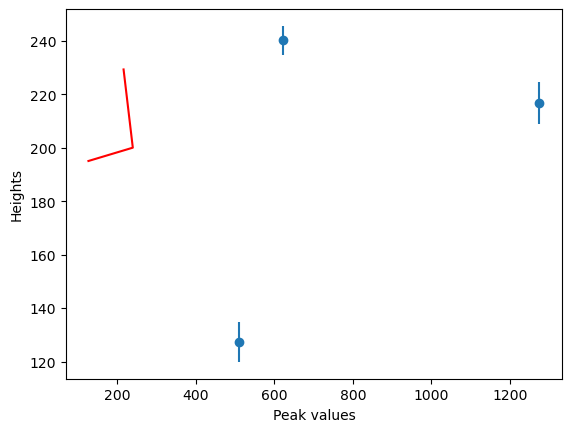

In [125]:
# create new figure
plt.figure()

# create errorbar plot with fit
plt.errorbar(peak_values, heights, yerr=y_err, fmt='o')
plt.xlabel("Peak values")
plt.ylabel("Heights")
plt.plot(heights, fit_result.best_fit, 'r-')